### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
mal = pd.read_csv('malaria.csv')
mal.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
mal.isnull().all(axis=1).sum()

4

- Yes

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df = (mal.isnull().sum()/mal.isnull().count())*100
mask = ((mal.isnull().sum()/mal.isnull().count())*100)>60
df[mask]

Cases_Nigeria     70.078740
Cases_Senegal     80.314961
Cases_Spain       87.401575
Cases_Mali        90.551181
Deaths_Nigeria    70.078740
Deaths_Senegal    82.677165
Deaths_Spain      87.401575
Deaths_Mali       90.551181
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
mal3 = mal.iloc[:,:4].isnull().sum()
mal4 = mal[['Deaths_Guinea','Deaths_Liberia','Deaths_SierraLeone','Deaths_Nigeria']]
print(mal3)
print('\n')
print(mal4.isnull().sum())


Cases_Guinea         34
Cases_Liberia        44
Cases_SierraLeone    40
Cases_Nigeria        89
dtype: int64


Deaths_Guinea         35
Deaths_Liberia        46
Deaths_SierraLeone    40
Deaths_Nigeria        89
dtype: int64


- Nigeria would be recorded again for observation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

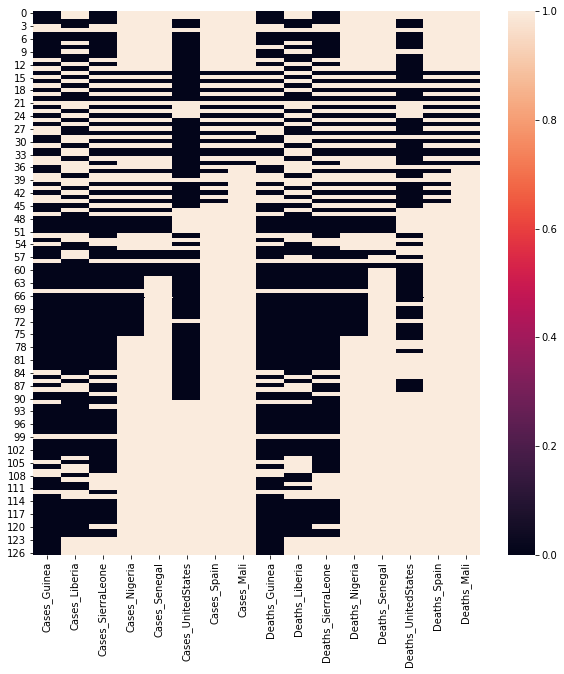

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(mal.isnull())

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
mal.dropna(thresh=3)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
121,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df = (mal.isnull().sum()/mal.isnull().count())*100
mask = ((mal.isnull().sum()/mal.isnull().count())*100)>60
print(df[mask])
print('\n')
mal1 = mal.copy()
mal1 = mal1.drop(columns=['Cases_Nigeria','Cases_Senegal','Cases_Spain','Cases_Mali','Deaths_Nigeria','Deaths_Senegal','Deaths_Spain','Deaths_Mali'])
mal1

Cases_Nigeria     70.078740
Cases_Senegal     80.314961
Cases_Spain       87.401575
Cases_Mali        90.551181
Deaths_Nigeria    70.078740
Deaths_Senegal    82.677165
Deaths_Spain      87.401575
Deaths_Mali       90.551181
dtype: float64




,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
mall = mal.copy()
mall['Cases_Liberia'] = mall['Cases_Liberia'].fillna(mall['Cases_Liberia'].median())
mall['Cases_Liberia'].isnull().sum()

0

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
malUS = mal.copy()
malUS['Cases_UnitedStates'] = malUS['Cases_UnitedStates'].fillna(malUS['Cases_UnitedStates'].mean())
malUS['Cases_UnitedStates'].isnull().sum()

0

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
malG = mal.copy()
malG['Cases_Guinea']= malG['Cases_Guinea'].fillna(malG['Cases_Guinea'].mean())
malG['Cases_Guinea'].isnull().sum()

0

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [12]:
ho = pd.read_csv('house.csv')
ho.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
hoob = (ho.dtypes == 'object')
hooo = hoob[hoob == True]
hos = (ho.skew()<0.05)
hoos = hos[hos == True]
print(hooo,'\n','\n',hoos)

Type          True
Method        True
Regionname    True
dtype: bool 
 
 Distance    True
dtype: bool


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


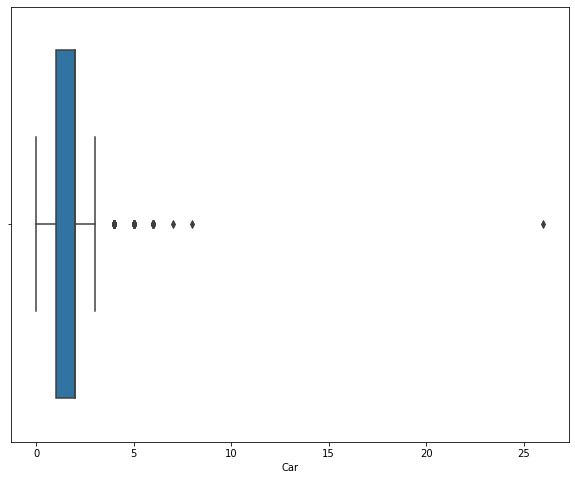

In [14]:
hou = ho.copy()
plt.figure(figsize=(10,8))
sns.boxplot(hou['Car'])
plt.show()

- Yes, there are outliers present.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


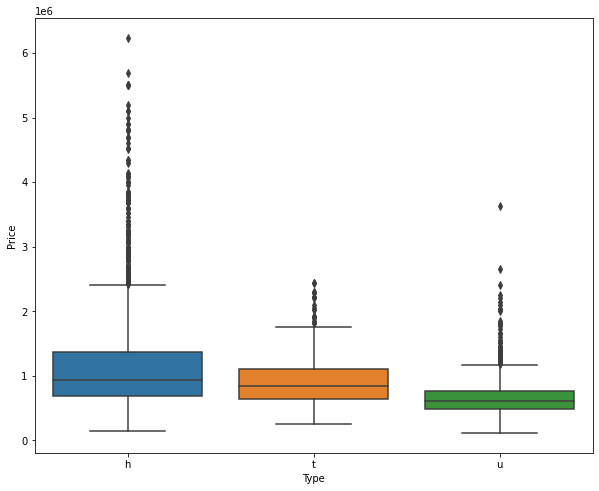

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(hou['Type'],hou['Price'])
plt.show()

- The 'h' Type has more outliers, then 'u' Type and the least amount of outliers are in 't' Type.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
hoR = ho.copy()
q1R = hoR['Rooms'].quantile(0.25)
q2R = hoR['Rooms'].quantile(0.5)
q3R = hoR['Rooms'].quantile(0.75)
iqrR = q3R-q1R
ULR = q3R + (1.5*iqrR)
LLR = q1R - (1.5*iqrR)
print('Lower Extreme:',LLR,'\n','Upper Extreme:',ULR)

Lower Extreme: -1.0 
 Upper Extreme: 7.0


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
ho3 = ho.copy()
q1BA = ho3['Bathroom'].quantile(0.25)
q2BA = ho3['Bathroom'].quantile(0.5)
q3BA = ho3['Bathroom'].quantile(0.75)
iqrBA = q3BA-q1BA
ULBA = q3BA + (1.5*iqrBA)
LLBA = q1BA - (1.5*iqrBA)
maskBA = (ho3['Bathroom']<ULBA) & (ho3['Bathroom']>LLBA)
hoBA = ho3[maskBA]
Outliers = ho['Bathroom'].count()-hoBA['Bathroom'].count()
print('No. of Outliers:',Outliers)

No. of Outliers: 71


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
hoB = ho.copy()
q1B = hoB['Bedroom'].quantile(0.25)
q2B = hoB['Bedroom'].quantile(0.5)
q3B = hoB['Bedroom'].quantile(0.75)
iqrB = q3B-q1B
ULB = q3B + (1.5*iqrB)
LLB = q1B - (1.5*iqrB)
maskB = (hoB['Bedroom']<ULB) & (hoB['Bedroom']>LLB)
hoBE = hoB[maskB]
OutliersB = ho['Bedroom'].count()-hoBE['Bedroom'].count()
print('No. of Outliers:',OutliersB)

maskBM = (hoB['Bedroom']>ULB) & (hoB['Bedroom']<LLB)
hoBED = hoB[maskBM]
print(hoBED['Bedroom'])

No. of Outliers: 14
Series([], Name: Bedroom, dtype: int64)


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
hoDI = ho.copy()
print('Original Mean:',hoDI['Distance'].mean())

q1D = hoDI['Distance'].quantile(0.25)
q2D = hoDI['Distance'].quantile(0.5)
q3D = hoDI['Distance'].quantile(0.75)
iqrD = q3D-q1D
ULD = q3D + (1.5*iqrD)
LLD = q1D - (1.5*iqrD)
maskD = (hoDI['Distance']<ULD) & (hoDI['Distance']>LLD)
hoDIM = hoDI[maskD]
print('Modified Mean:',hoDIM['Distance'].mean())
print('Change in average distance:',(hoDI['Distance'].mean()-hoDIM['Distance'].mean()))


Original Mean: 19.32834662190515
Modified Mean: 19.311425554382247
Change in average distance: 0.016921067522904565


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
hoP = ho.copy()
q1P = hoP['Price'].quantile(0.25)
q2P = hoP['Price'].quantile(0.5)
q3P = hoP['Price'].quantile(0.75)
iqrP = q3P-q1P
ULP = q3P + (1.5*iqrP)
LLP = q1P - (1.5*iqrP)
print('Upper Limit:',ULP,'\n','Lower Limit:',LLP)

Upper Limit: 2180625.0 
 Lower Limit: -316375.0


<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
ho.Distance.describe()
df = ho.copy()
df['Distance_from_CBD'] = ho['Distance']
df['Distance_from_CBD'] = ['Far' if x>22.2 else 'Medium' if 22.2<=x<16.5 else 'Close' for x in df['Distance_from_CBD']]
print(df)

      Rooms Type    Price Method  ... Landsize  Distance  Bedroom  Distance_from_CBD
0         3    h  1490000      S  ...      126      25.2        2                Far
1         3    h  1220000      S  ...      202      21.8        2              Close
2         3    h  1420000      S  ...      156      21.7        2              Close
3         3    h  1515000      S  ...        0      18.8        3              Close
4         2    h   670000      S  ...      134      20.6        3              Close
...     ...  ...      ...    ...  ...      ...       ...      ...                ...
4761      3    h  1150000     VB  ...      305      18.7        3              Close
4762      3    h   712000      S  ...      105      16.0        4              Close
4763      4    h   800000      S  ...      120      24.5        3                Far
4764      3    u   747000      S  ...        0      22.9        3                Far
4765      3    h   800000     SP  ...        0      13.7        3

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

          Distance     Price
Distance  1.000000 -0.006573
Price    -0.006573  1.000000


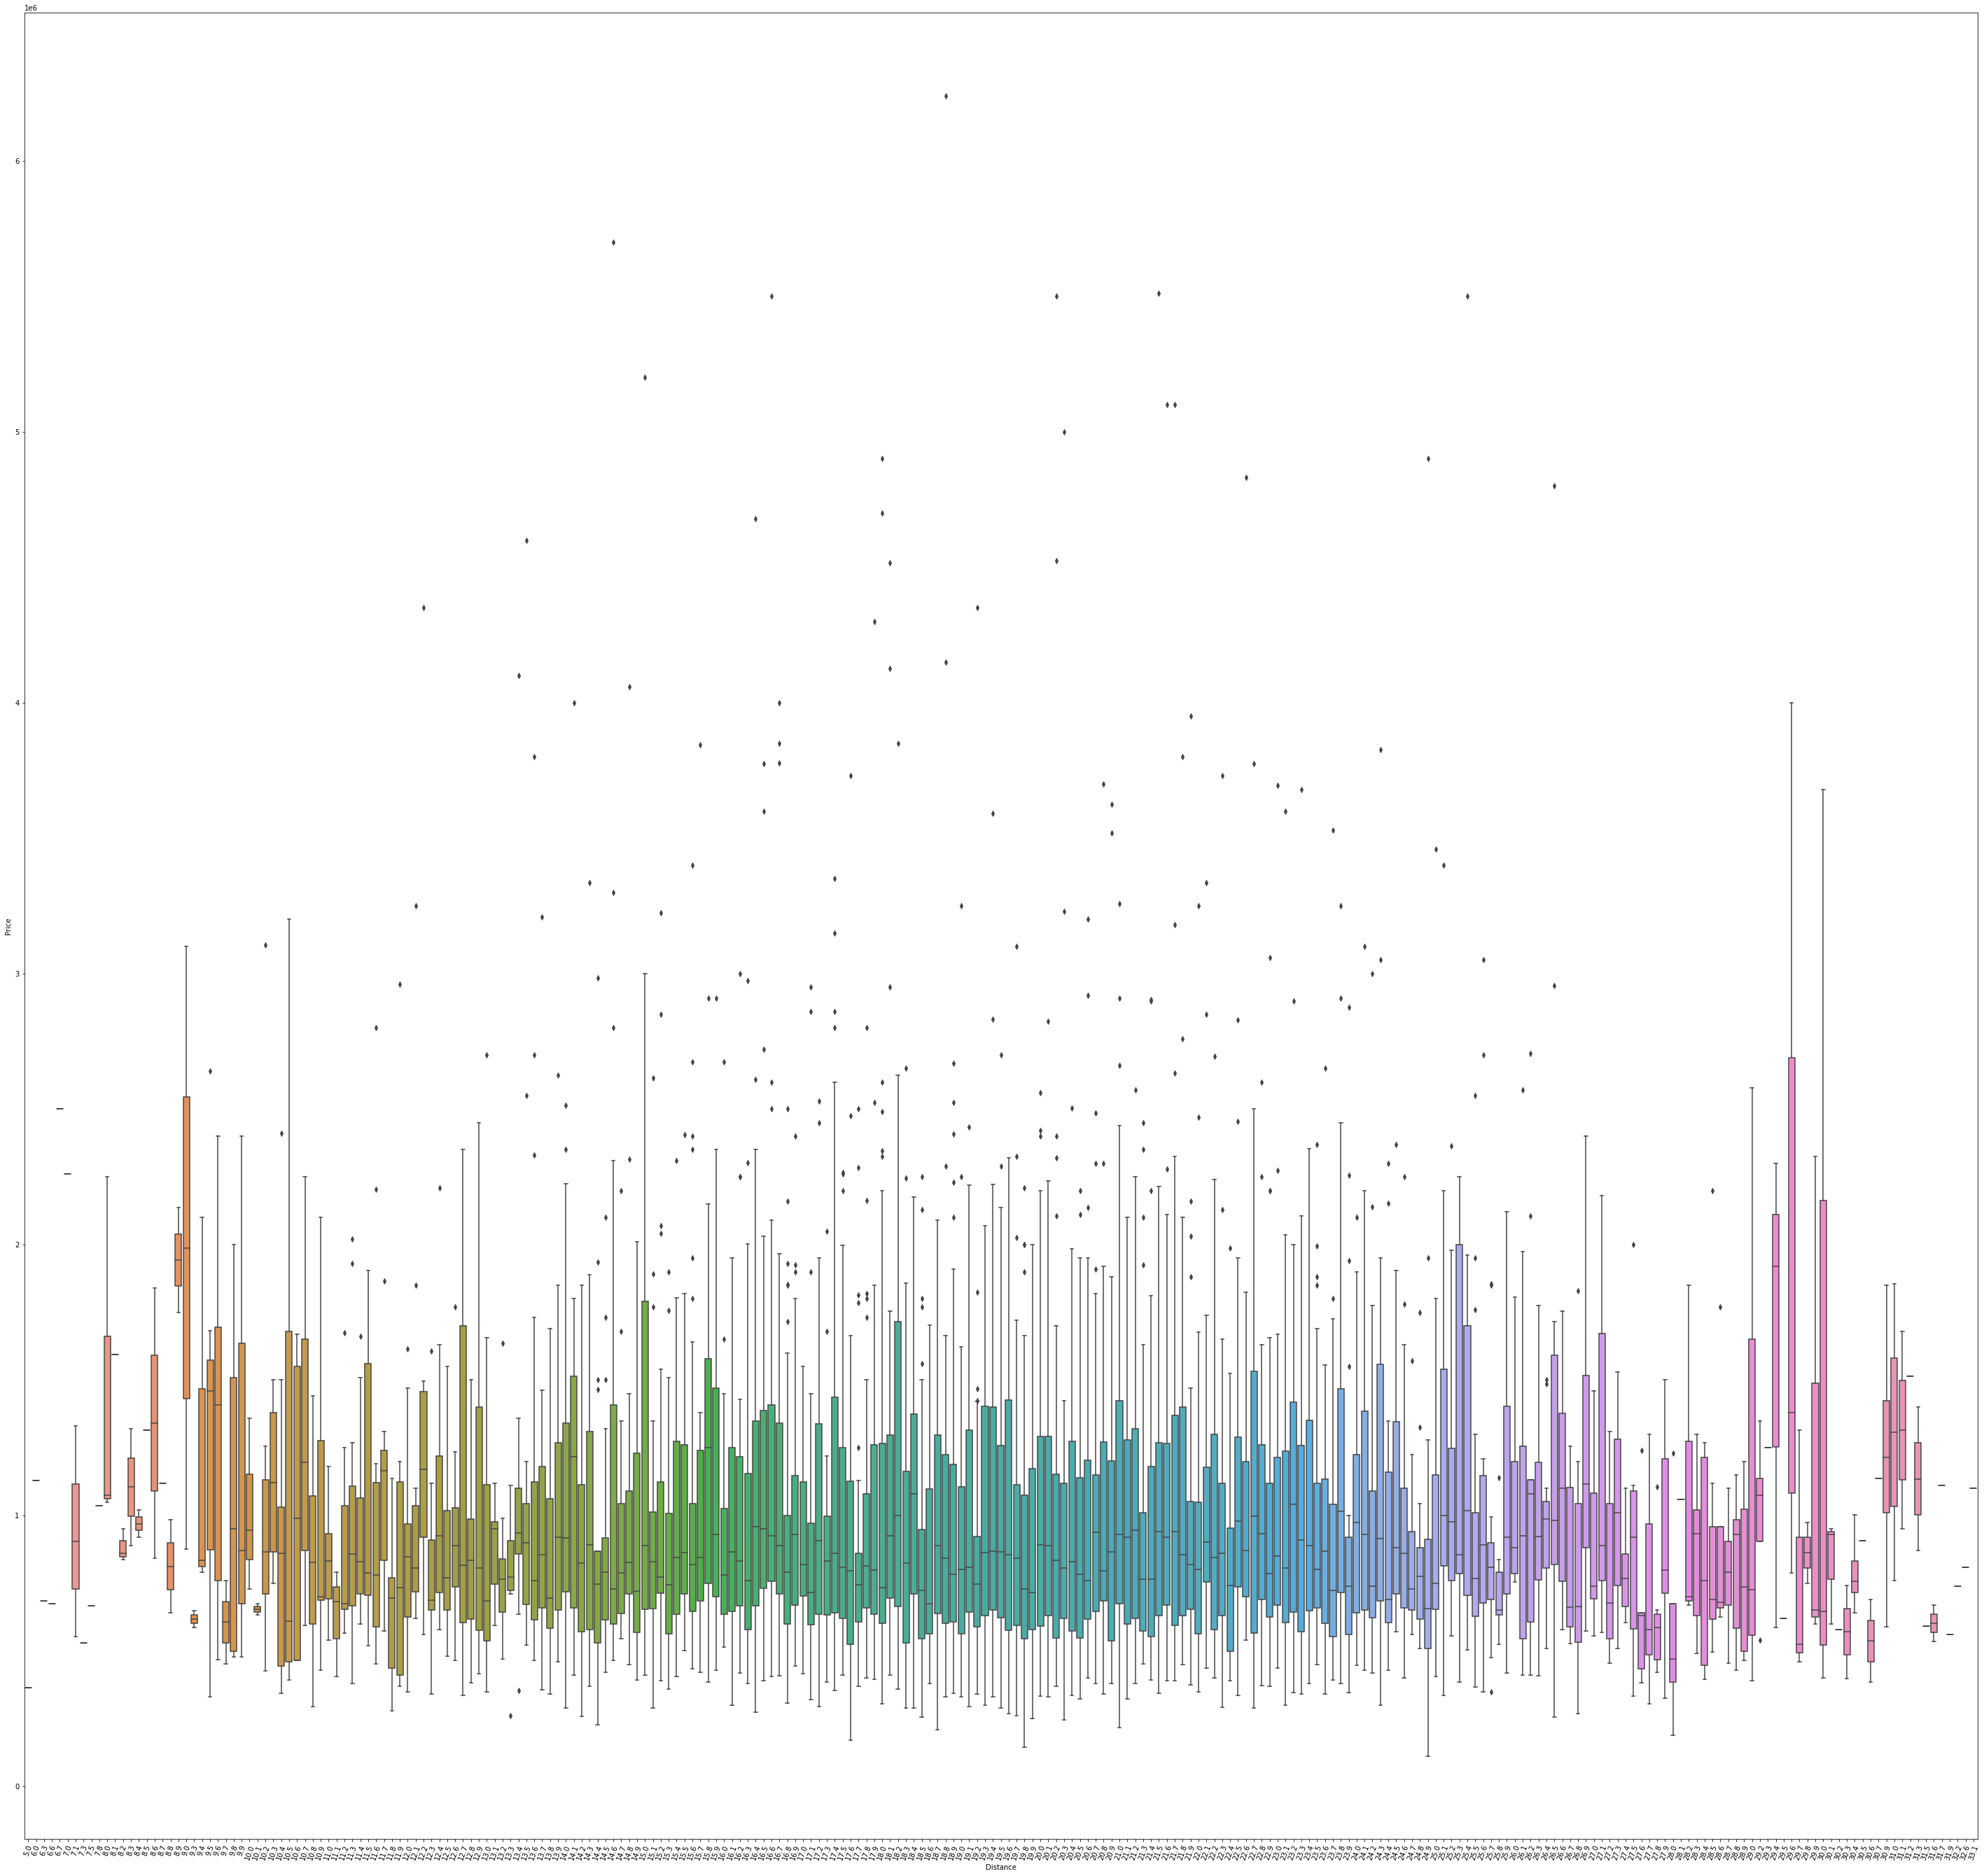

In [22]:
hoPD = ho[['Distance','Price']]
print(hoPD.corr())
plt.figure(figsize=(50,48))
sns.boxplot(x='Distance',y='Price',data=ho)
plt.xticks(rotation=70)
plt.show()

- From the box plot we can confer that some houses which are btweeen 8.7 and 10.8, also between 19.5 and 22 have larger prices. 

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
y = ho['Price']
x = ho.drop(columns='Price')
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)
print(x_train.shape,'|',y_train.shape,'|',x_test.shape,'|',y_test.shape)

(3812, 9) | (3812,) | (954, 9) | (954,)
